### Importing packages and dataset:

In [2]:
!pip install -U pandasql

Requirement already up-to-date: pandasql in c:\users\saurabh\anaconda3\lib\site-packages (0.7.3)


In [6]:
import pandas as pd
import numpy as np
import datetime as dt
import math as m
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as Sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from pandasql import sqldf

In [5]:
!pip install WordCloud

In [7]:
nflix_df = pd.read_csv("netflix_titles.csv")

### Previewing and inspecting the dataset:

In [8]:
nflix_df.shape      ## # of Rows and Colums
nflix_df.info()     ## General data info
nflix_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [51]:
# Checking Null values
nflix_df.isna().sum().sort_values()        ## # of null values


show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
duration           3
rating             4
date_added        10
month_added       10
year_added        10
cast             825
country          831
director        2634
dtype: int64

In [10]:
round(100*(nflix_df.isnull().sum()/len(nflix_df.index)),1).sort_values(ascending = False)

director        29.9
country          9.4
cast             9.4
date_added       0.1
description      0.0
listed_in        0.0
duration         0.0
rating           0.0
release_year     0.0
title            0.0
type             0.0
show_id          0.0
dtype: float64

In [ ]:
# % of missing value in each column:
# 1/ Director: ~ 30% data missing
# 2/ Country and Cast:~ 9.5% data missing

### Preparing data for analysis:

In [11]:
# Dropping NA values
nflix_df['date_added'] = pd.to_datetime(nflix_df['date_added'], infer_datetime_format = True)
nflix_df.dropna()
print(nflix_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB
None


In [12]:
# Converting dtypes
nflix_df['month_added'] = pd.DatetimeIndex(nflix_df['date_added']).month   ##experimenting 2 different syntax for formatting datetime datatype
nflix_df['year_added'] = nflix_df['date_added'].dt.year
nflix_df.info()
nflix_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  month_added   8797 non-null   float64       
 13  year_added    8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0


### Analysis:
#### Content Types Analysis:

In [52]:
# TV-Show trend by years:

In [13]:
# count type-tv show, group by years

query = '''
SELECT show_id,type, COUNT(type) as count_tv,year_added
FROM nflix_df
WHERE type = "TV Show"
GROUP BY year_added
ORDER BY year_added DESC
'''
sqldf(query)

,show_id,type,count_tv,year_added
0,s2,TV Show,505,2021.0
1,s1474,TV Show,595,2020.0
2,s3080,TV Show,592,2019.0
3,s4251,TV Show,412,2018.0
4,s5101,TV Show,349,2017.0
5,s5654,TV Show,176,2016.0
6,s5878,TV Show,26,2015.0
7,s5923,TV Show,5,2014.0
8,s5940,TV Show,5,2013.0
9,s6612,TV Show,1,2008.0


In [53]:
#  TV Show is trending up over year

# Note: There was 0 TV show added from 2009 to 2012

# Movie trend by years:

In [14]:
query = '''
SELECT show_id, type, COUNT(type) as count_movie, year_added
FROM nflix_df
WHERE type = "Movie"
GROUP BY year_added
ORDER BY year_added DESC
'''
sqldf(query)

,show_id,type,count_movie,year_added
0,s1,Movie,993,2021.0
1,s1471,Movie,1284,2020.0
2,s3078,Movie,1424,2019.0
3,s4230,Movie,1237,2018.0
4,s5102,Movie,839,2017.0
5,s5653,Movie,253,2016.0
6,s5877,Movie,56,2015.0
7,s5921,Movie,19,2014.0
8,s5937,Movie,6,2013.0
9,s5942,Movie,3,2012.0


In [54]:
# Movie is also trending up

# The difference in # of times added between TV-Show and Movie plot:

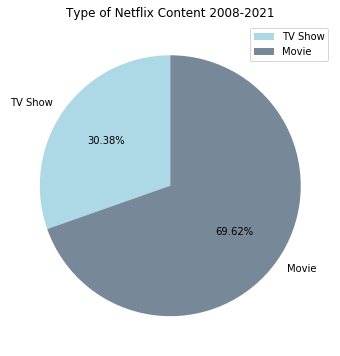

In [15]:
# Pie, value counts 2 vars

plt.figure(figsize = (13, 6))
labels = ['TV Show', 'Movie']
plt.pie(nflix_df['type'].value_counts().sort_values(),labels = labels, colors = ['lightblue', 'lightslategrey'], autopct ='%1.2f%%', startangle = 90)
plt.title('Type of Netflix Content 2008-2021')
plt.legend(labels = ['TV Show', 'Movie'], loc = 'upper right')
plt.show()

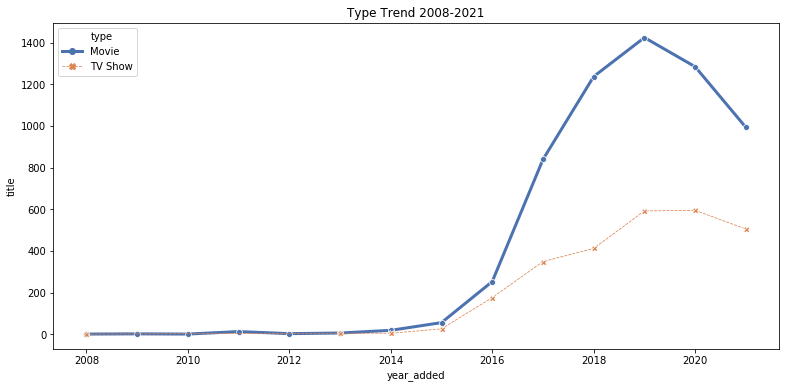

In [16]:
# Tv-Show and Movie trend by years:
type_year = (nflix_df.groupby(['type','year_added'])['title'].size().reset_index())

fig = plt.figure(figsize=(13,6))
Sns.lineplot(x = 'year_added',y = 'title', data = type_year, style = 'type', hue ='type', size = 'type', markers = True, palette = 'deep')
plt.title("Type Trend 2008-2021")

plt.show()

In [17]:
nflix_df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
# =>

# The # of Movie and TV Show added trending up over year until the end of 2019.
# The # of Movie added is greater than TV Show.

### Directors Analysis:

In [18]:
# Top 10 directors listed:

query = '''
SELECT director, COUNT(director) AS num_director
FROM nflix_df
GROUP BY director
ORDER BY num_director DESC
LIMIT 10   
'''

sqldf(query) 

,director,num_director
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Jay Chapman,12
9,Steven Spielberg,11


In [19]:
# 2021 Top 5 directors:

query = '''
SELECT director, COUNT(director) AS num_director, year_added 
FROM nflix_df
WHERE year_added = '2021.0'
GROUP BY director
ORDER BY num_director DESC
LIMIT 5
'''

sqldf(query)

,director,num_director,year_added
0,Rajiv Chilaka,16,2021.0
1,Suhas Kadav,15,2021.0
2,Hidenori Inoue,7,2021.0
3,Lasse Hallström,5,2021.0
4,Toshiya Shinohara,4,2021.0


In [20]:
# Top 5 directors (2000):
query = '''
SELECT director, COUNT(director) AS num_director, year_added 
FROM nflix_df
WHERE year_added = '2020'
GROUP BY director
ORDER BY num_director DESC
LIMIT 5
'''

sqldf(query)

,director,num_director,year_added
0,Youssef Chahine,11,2020.0
1,Joey So,6,2020.0
2,Cathy Garcia-Molina,6,2020.0
3,Thierry Donard,5,2020.0
4,Sooraj R. Barjatya,4,2020.0


In [21]:
# Top 5 directors (2019):

query = '''
SELECT director, COUNT(director) AS num_director, year_added 
FROM nflix_df
WHERE year_added = '2019'
GROUP BY director
ORDER BY num_director DESC
LIMIT 5
'''

sqldf(query)

,director,num_director,year_added
0,Martin Scorsese,7,2019.0
1,Cathy Garcia-Molina,7,2019.0
2,Wenn V. Deramas,6,2019.0
3,Steven Spielberg,6,2019.0
4,Kunle Afolayan,6,2019.0


In [22]:
# Top 5 directors (2018):

query = '''
SELECT director, COUNT(director) AS num_director, year_added 
FROM nflix_df
WHERE year_added = '2018'
GROUP BY director
ORDER BY num_director DESC
LIMIT 5
'''

sqldf(query)

,director,num_director,year_added
0,"Raúl Campos, Jan Suter",12,2018.0
1,Johnnie To,7,2018.0
2,Matt Askem,6,2018.0
3,Riri Riza,5,2018.0
4,Mike Clattenburg,5,2018.0


In [23]:
# Top 5 directors (2017):

query = '''
SELECT director, COUNT(director) AS num_director, year_added 
FROM nflix_df
WHERE year_added = '2017'
GROUP BY director
ORDER BY num_director DESC
LIMIT 5
'''

sqldf(query)

,director,num_director,year_added
0,Jay Chapman,7,2017.0
1,S.S. Rajamouli,6,2017.0
2,Marcus Raboy,6,2017.0
3,Umesh Mehra,5,2017.0
4,Rajiv Mehra,4,2017.0


### Country Analysis:

In [24]:
# Top 10 countries:
query = '''
SELECT country, COUNT(country) AS country_count
FROM nflix_df
GROUP BY country
ORDER BY country_count DESC
LIMIT 10
'''

sqldf(query)

,country,country_count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


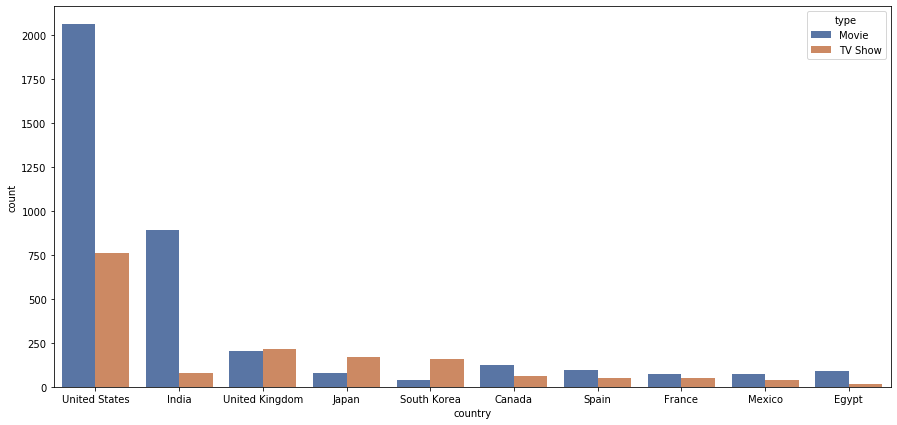

In [25]:
plt.figure(figsize=(15,7))
Sns.countplot(nflix_df["country"],hue = nflix_df["type"],order = nflix_df["country"].value_counts().index[:10], data = nflix_df, palette = 'deep')

### Rating Analysis:

In [26]:
# Top 10 ratings:
query = '''
SELECT rating, COUNT(rating) AS num_rating
FROM nflix_df
GROUP BY rating
ORDER BY num_rating DESC
LIMIT 10
'''

sqldf(query)

,rating,num_rating
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [ ]:
"""1 TV-MA: For Mature Audiences. May not be suitable for ages 17 and under (Adults)
2 TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under (Teens > 14)
3 R: Restricted. May be inappropriate for ages 17 and under (Adults)
4 TV-PG: Suitable for General Audiences (Kids)
5 PG-13:
6 PG: Parental Guidance suggested (Kids)
7 TV-Y:Designed to be appropriate for all children (Kids)
8 TV-Y7: Suitable for ages 7 and up (Kids)¶
9 TV-G: Suitable for General Audiences (Kids)
10 G: Suitable for General Audiences (Kids)"""

In [27]:
#Most notable rating types in the past 5 years (2017-2021): Let's check if those rating types above are still trending in the past 5 years
# Max count of rating type (2017-2021)
query = '''
SELECT rating, MAX(num_rating) AS max_ct, year_added
FROM
    (SELECT rating, COUNT(rating) AS num_rating, year_added
    FROM nflix_df
    WHERE year_added >= '2017'
    GROUP BY rating, year_added)
GROUP BY year_added
ORDER BY year_added DESC
'''

sqldf(query)

,rating,max_ct,year_added
0,TV-MA,489,2021.0
1,TV-MA,671,2020.0
2,TV-MA,736,2019.0
3,TV-MA,650,2018.0
4,TV-MA,446,2017.0


In [28]:
query = '''
SELECT rating, COUNT(rating) AS num_rating, type, COUNT(type) AS num_type
    FROM nflix_df
    WHERE rating = 'TV-MA'
    GROUP BY rating, type
'''

sqldf(query)

,rating,num_rating,type,num_type
0,TV-MA,2062,Movie,2062
1,TV-MA,1145,TV Show,1145


In [ ]:
##  TV-MA is dominating in the last 5 years

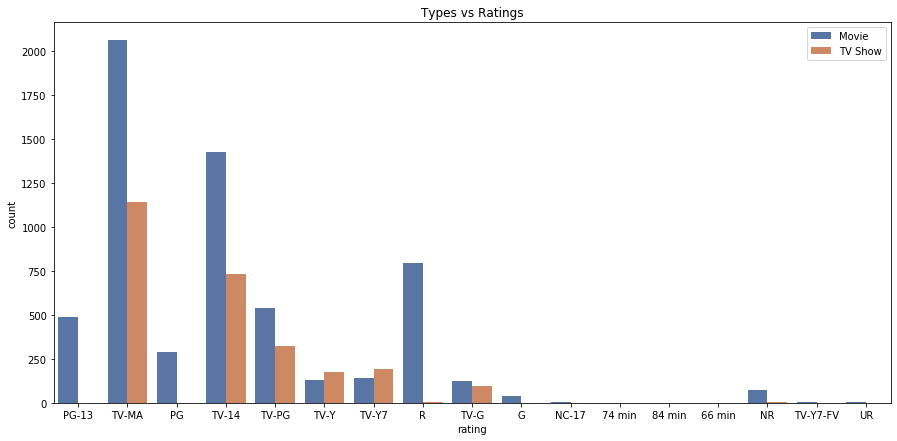

In [29]:
#Types of Content vs Rating Types plot:
# Types of Content vs Rating Types plot:

plt.figure(figsize=(15,7))
Sns.countplot(nflix_df["rating"],hue = nflix_df["type"],data = nflix_df, palette = 'deep')
plt.title('Types vs Ratings')
plt.legend(loc = 'upper right')

In [ ]:
"""TV-MA: We can tellby looking at the plot that almost half of TV-MA is Movie and the rest is Tv-Show
TV-14: Same as TV-MA
Good to consier: R and PG-13: Little to 0 TV-Show"""

In [30]:
#Let's dig deeper into the top ratings of content made from the US:
# Max count ratings of content from the US by years: 

query = '''
SELECT rating, MAX(num_rating) AS max_rating, year_added, country
FROM
    (SELECT rating, COUNT(rating) AS num_rating, year_added, country
     FROM nflix_df
     GROUP BY rating, year_added, country)
WHERE country = 'United States' 
GROUP BY country, year_added
ORDER BY year_added DESC
'''

sqldf(query)

,rating,max_rating,year_added,country
0,R,111,2021.0,United States
1,TV-MA,186,2020.0,United States
2,TV-MA,210,2019.0,United States
3,TV-MA,192,2018.0,United States
4,TV-MA,142,2017.0,United States
5,TV-MA,61,2016.0,United States
6,TV-MA,24,2015.0,United States
7,TV-MA,8,2014.0,United States
8,NR,3,2013.0,United States
9,PG,1,2012.0,United States


In [ ]:
#We can see that for content produced from the US, TV-MA has been the most popular rating within the last 5 years here.
#Should also take R rating type into account since it might be a new rating trend for up-coming years

### Duration Analysis:

In [31]:
#Number of times a duration type listed (2008-2021) (general):
# Duration count DESC
query ='''
SELECT duration, COUNT(duration) AS num_duration
FROM nflix_df
GROUP BY duration
ORDER BY num_duration DESC
LIMIT 15
'''
sqldf(query)

,duration,num_duration
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,90 min,152
4,97 min,146
5,94 min,146
6,93 min,146
7,91 min,144
8,95 min,137
9,96 min,130


In [32]:
#Let's look into which duration types are the dominated ones in the past 5 years (2017-2021)
# Count Max # of duration by year

query ='''

SELECT duration, MAX(ct_duration) AS MAX_duration, year_added
FROM
    (SELECT duration, COUNT(duration) AS ct_duration, year_added
    FROM nflix_df
    GROUP BY year_added, duration
    ORDER BY year_added DESC)
GROUP BY year_added
ORDER BY year_added DESC

'''
sqldf(query)

,duration,MAX_duration,year_added
0,1 Season,294,2021.0
1,1 Season,383,2020.0
2,1 Season,414,2019.0
3,1 Season,292,2018.0
4,1 Season,253,2017.0
5,1 Season,140,2016.0
6,1 Season,14,2015.0
7,100 min,2,2014.0
8,1 Season,2,2013.0
9,26 min,1,2012.0


In [55]:
# We can see that the most outstading duration when we look into years of 2008-2021, and, one that's dominating the past 5 years (2017-2021 timeframe): 1 Season

In [33]:
#Let's see if 1 Season is dominating when it comes to content produced by the US:
# Count max duration type of the US, group and short by years
query ='''
   
SELECT duration, MAX(ct_duration), year_added, country
FROM
   (SELECT duration, COUNT(duration) AS ct_duration, year_added, country
     FROM nflix_df
     GROUP BY year_added, duration
     ORDER BY year_added DESC)
WHERE country = 'United States'
GROUP BY year_added
ORDER BY year_added DESC

'''
sqldf(query)

,duration,MAX(ct_duration),year_added,country
0,97 min,37,2021.0,United States
1,1 Season,383,2020.0,United States
2,90 min,38,2019.0,United States
3,110 min,23,2018.0,United States
4,1 Season,253,2017.0,United States
5,88 min,9,2016.0,United States
6,78 min,5,2015.0,United States
7,71 min,2,2014.0,United States
8,100 min,1,2013.0,United States
9,26 min,1,2012.0,United States


In [ ]:
## We can see that 1 Season is also the dominating one

### Genre Analysis:

In [34]:
#Top 10 generes listed by Netflix in 2008-2021
count_genre = (nflix_df.set_index('title').listed_in.str.split(",", expand = True).stack().value_counts().sort_values(ascending = False).iloc[:30])
print(count_genre)

 International Movies         2624
Dramas                        1600
Comedies                      1210
Action & Adventure             859
Documentaries                  829
 Dramas                        827
International TV Shows         774
 Independent Movies            736
 TV Dramas                     696
 Romantic Movies               613
Children & Family Movies       605
 International TV Shows        577
 Thrillers                     512
 Comedies                      464
 TV Comedies                   461
Crime TV Shows                 399
Kids' TV                       388
 Music & Musicals              357
 Romantic TV Shows             338
Stand-Up Comedy                334
Horror Movies                  275
British TV Shows               253
 Sci-Fi & Fantasy              230
Docuseries                     221
 Sports Movies                 218
Anime Series                   176
 Docuseries                    174
 Spanish-Language TV Shows     172
 Korean TV Shows    

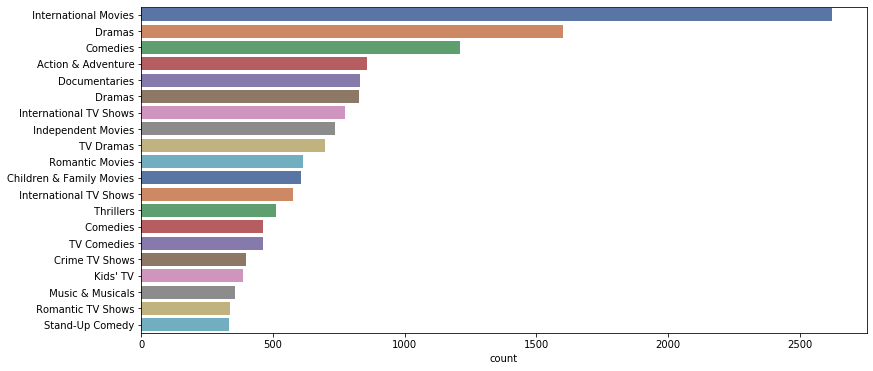

In [35]:
# Viz of the top 20 genres:
genre_list = nflix_df.set_index('title').listed_in.str.split(",",expand=True).stack().reset_index(level = 1, drop = True)
plt.figure(figsize=(13,6))
Sns.countplot(y = genre_list, order = genre_list.value_counts().index[:20], palette = 'deep')
plt.show()

In [ ]:
"""We can see that International Movies is the most outstanding genre with 2624 counts
Drama genre is the second best with 2427 count
Let's see if International Movies and Dramas are favored when it comes to content produced from the U.S,
aka we check the trend of genres (the U.S specifically):"""

### Release years analysis:

In [39]:
# Let's look at what release years are picked the most:
# Count unique release years and bin:
nflix_df['release_year'].value_counts(normalize = True, bins = 10).to_frame()

,release_year
"(2011.4, 2021.0]",0.805382
"(2001.8, 2011.4]",0.125695
"(1992.2, 2001.8]",0.033383
"(1982.6, 1992.2]",0.017032
"(1973.0, 1982.6]",0.010106
"(1963.4, 1973.0]",0.004201
"(1953.8, 1963.4]",0.002384
"(1934.6, 1944.2]",0.000908
"(1944.2, 1953.8]",0.000795
"(1924.903, 1934.6]",0.000114


### Exploring common words mentions in Description and Title columns:

In [42]:
# Preview the Description column:

nflix_df['description'].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

In [43]:
# Preview the Title column:
nflix_df['title'].head()

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [44]:
# Description - common words count:
# str split, expand and stack back, then value counts

d_list = nflix_df['description'].str.split(" ",expand=True).stack().reset_index(level = 1, drop = True)
d_ct = d_list.value_counts(ascending = False).iloc[:30]
print(d_ct)

a        10108
the       7714
to        6342
and       6309
of        5273
in        3683
his       3342
with      2146
her       2068
for       1762
an        1712
on        1666
their     1661
A         1500
from      1194
is        1105
as        1083
by         998
this       972
he         860
that       818
who        805
when       766
When       746
into       712
young      686
at         684
In         651
–          605
After      573
dtype: int64


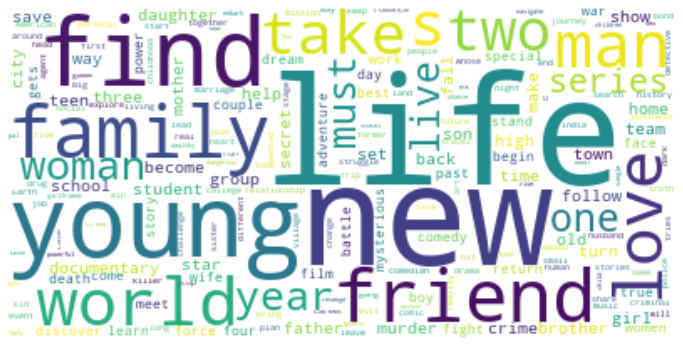

In [45]:
#Description common words plot
# Joining Rows of D column into a big chunk text then plot
str1 = " ".join(description for description in nflix_df.description) # Another solution to joining text into one big chunk of text

plt.figure(figsize=[12,15])
plot_d = WordCloud(stopwords = STOPWORDS, collocations = False, background_color = 'white', max_font_size = 90, max_words = 200).generate(str1)
plt.imshow(plot_d, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
# Title - common words count:
# Convert rows into one single list, join the list by " " into big one chunk, split the chunk, then counter
title_list = nflix_df['title'].to_list()   #Trying a different solution for joining and splitting str
join_list = " ".join(title_list)
count = Counter(join_list.split(" "))
most_common = count.most_common(50)
print(most_common)

[('The', 1544), ('of', 691), ('the', 677), ('in', 229), ('and', 225), ('A', 217), ('&', 179), ('to', 168), ('Love', 149), ('My', 143), ('a', 134), ('2', 104), ('I', 94), ('with', 87), ('You', 77), ('Christmas', 77), ('Man', 76), ('for', 75), ('Story', 73), ('Life', 71), ('on', 68), ('World', 65), ('Little', 63), ('-', 61), ('One', 60), ('Movie', 58), ('Last', 57), ('Time', 56), ('In', 55), ('Black', 53), ('Me', 53), ('American', 53), ('Is', 51), ('All', 50), ('House', 49), ('at', 47), ('Day', 45), ('Live', 45), ('de', 44), ('Super', 43), ('Power', 43), ('Up', 42), ('Girl', 41), ('We', 40), ('City', 39), ('El', 39), ('New', 38), ('Night', 38), ('No', 38), ('Your', 37)]


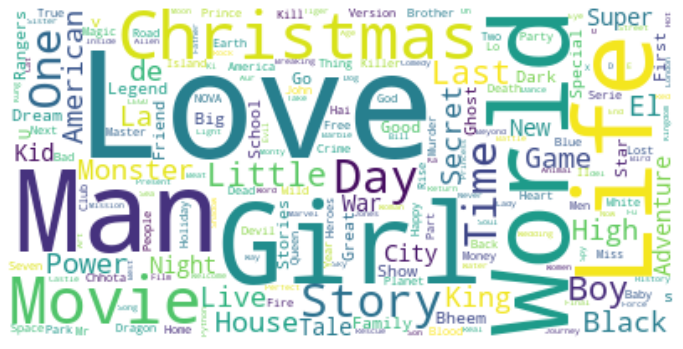

In [47]:
# Title - common words plot:
plt.figure(figsize=[12,15])
plot_t = WordCloud(stopwords = STOPWORDS, collocations = False, background_color = 'white', max_font_size = 90, max_words = 200).generate(join_list)
plt.imshow(plot_t, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
"""- Description:  Level 1: Life, New, Young, Family, Friend
                    Level 2: Love, Woman, Man, World, Live
                    Level 3: Help, Father, Girl, Student, Documentary, Series, Home

- Title: Level 1: Love, Man, World, Girl, Life, Christmas
             Level 2: Time, Power, Live, Adventure, Story"""

'- Description:  Level 1: Life, New, Young, Family, Friend\n                    Level 2: Love, Woman, Man, World, Live\n                    Level 3: Help, Father, Girl, Student, Documentary, Series, Home\n\n- Title: Level 1: Love, Man, World, Girl, Life, Christmas\n             Level 2: Time, Power, Live, Adventure, Story'

## Conclusion

In [50]:
"""To make a recommendation for what type of content will attract more customers, aka content that seems to be favored by NetFlix:¶
Top country where content produced: The United States
Type: Movie
Rating: TV-MA

Note: Should also consider R rating type since it's the most added rating type in 2021
Duration: 1 Season

Genres: International Movies and Dramas
Released years: 2011-present
These are some of key words to consider: YOUNG, LIFE, LOVE, FAMILY, FRIENDS, WOMAN, MAN, LIFE, WORLD, CHRISTMAS."""

"To make a recommendation for what type of content will attract more customers, aka content that seems to be favored by NetFlix:¶\nTop country where content produced: The United States\nType: Movie\nRating: TV-MA\n\nNote: Should also consider R rating type since it's the most added rating type in 2021\nDuration: 1 Season\n\nGenres: International Movies and Dramas\nReleased years: 2011-present\nThese are some of key words to consider: YOUNG, LIFE, LOVE, FAMILY, FRIENDS, WOMAN, MAN, LIFE, WORLD, CHRISTMAS."

######